# Exploratory data analysis - Dropout Data

In [237]:
import pandas as pd
import numpy as np

from dython.nominal import associations
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [239]:
# path for saving figures
fig_path = '../reports/figs/eda_dropout'

# helper function for saving figures
def save_fig(fig, filename):
    fig.savefig(os.path.join(fig_path, filename), bbox_inches='tight')

In [240]:
df = pd.read_csv("../data/dropout.csv")
df = df.drop(df[df.Target=='Enrolled'].index)

df.rename({'Target': 'Enrollment status'}, axis=1, inplace=True)
df.rename({'Nacionality': 'Nationality'}, axis=1, inplace=True)


The prediction goal of this dataset is the binary target 'enrollment status'. The following code visualizes the characteristics of 'enrollment status', particularly inspected in relation to protected attributes.

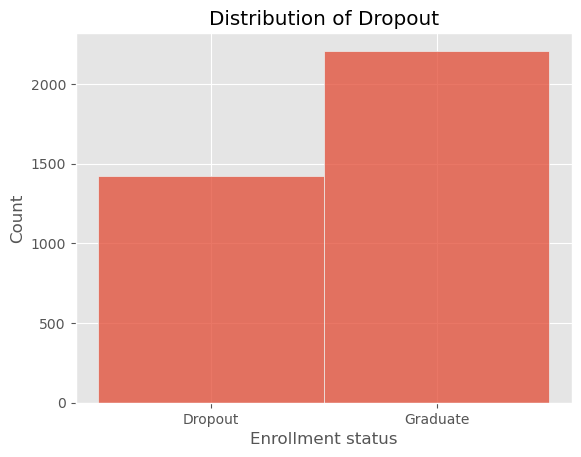

In [242]:
fig,ax = plt.subplots()
sns.histplot(x=  "Enrollment status",data=df,ax=ax)

ax.set_title("Distribution of Dropout")
save_fig(fig, "dropout_dist.svg")


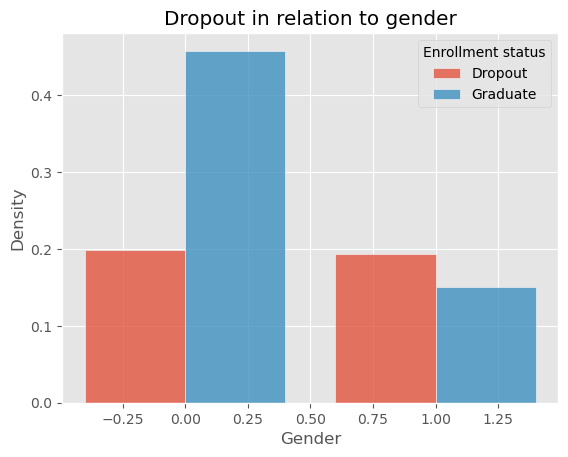

In [243]:
fig,ax = plt.subplots()
sns.histplot(x="Gender",data=df, hue=  "Enrollment status",multiple="dodge",discrete=True,shrink=.8,stat="density")


ax.set_title("Dropout in relation to gender")
save_fig(fig, "dropout_gender.svg")

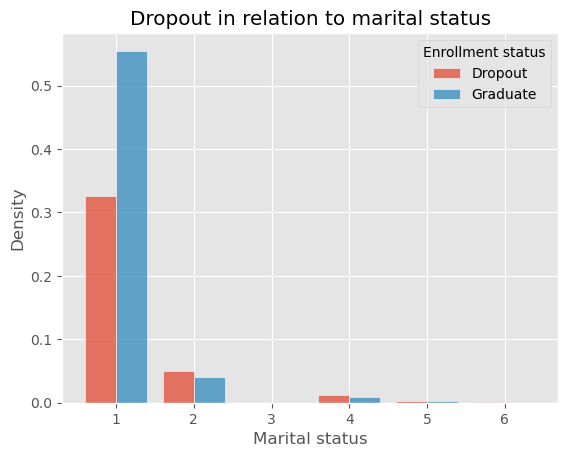

In [259]:
fig,ax = plt.subplots()
sns.histplot(x="Marital status",data=df, hue=  "Enrollment status",multiple="dodge",discrete=True,shrink=.8,stat="density")


ax.set_title("Dropout in relation to marital status")
save_fig(fig, "dropout_marital.svg")

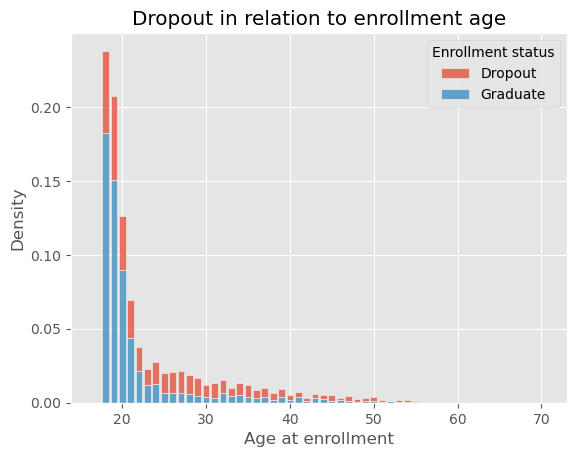

In [245]:
fig,ax = plt.subplots()
sns.histplot(x="Age at enrollment",data=df, hue=  "Enrollment status",multiple="stack",discrete=True,shrink=.8,stat="density")

ax.set_title("Dropout in relation to enrollment age")
save_fig(fig, "dropout_age.svg")

In [246]:
len(df)

3630

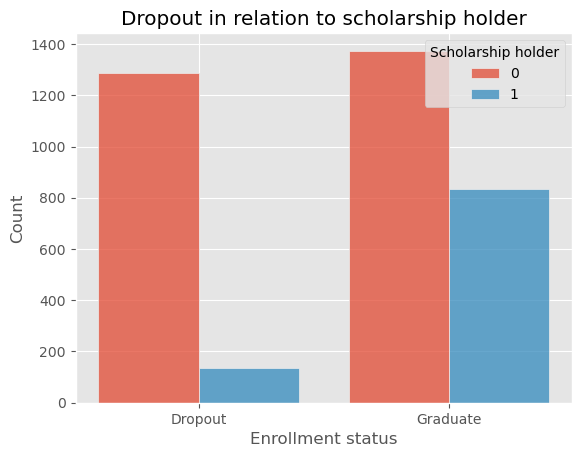

In [247]:
fig,ax = plt.subplots()
sns.histplot(x=  "Enrollment status",data=df, hue="Scholarship holder",multiple="dodge",discrete=True,shrink=.8,legend=True)

ax.set_title("Dropout in relation to scholarship holder")
save_fig(fig, "dropout_scholarship.svg")

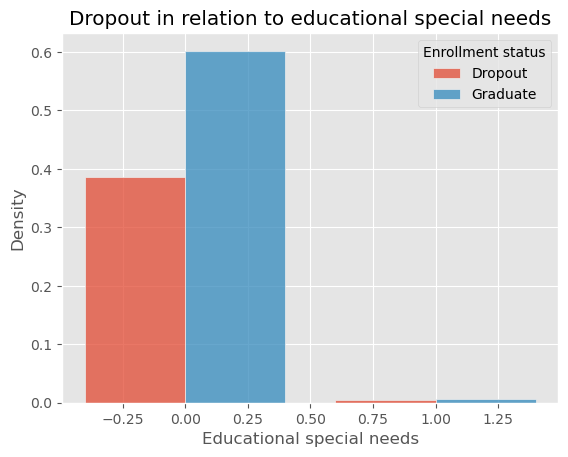

In [248]:
fig,ax = plt.subplots()
sns.histplot(x="Educational special needs",data=df, hue=  "Enrollment status",multiple="dodge",discrete=True,shrink=.8,legend=True,stat="density")

ax.set_title("Dropout in relation to educational special needs")
save_fig(fig, "dropout_edu_special_needs.svg")

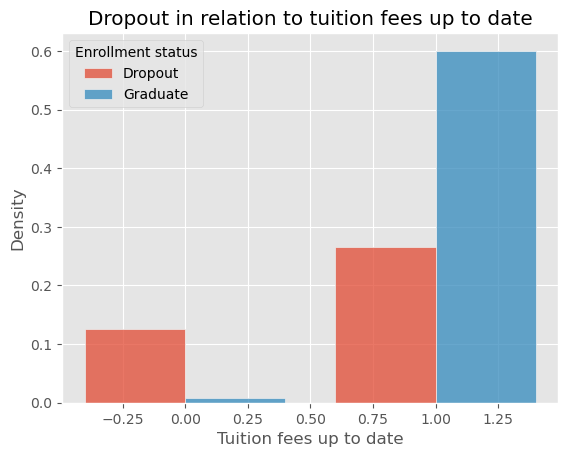

In [249]:
fig,ax = plt.subplots()
sns.histplot(x="Tuition fees up to date",data=df, hue=  "Enrollment status",multiple="dodge",discrete=True,shrink=.8,legend=True,stat="density")

ax.set_title("Dropout in relation to tuition fees up to date")
save_fig(fig, "dropout_tuition_fees.svg")

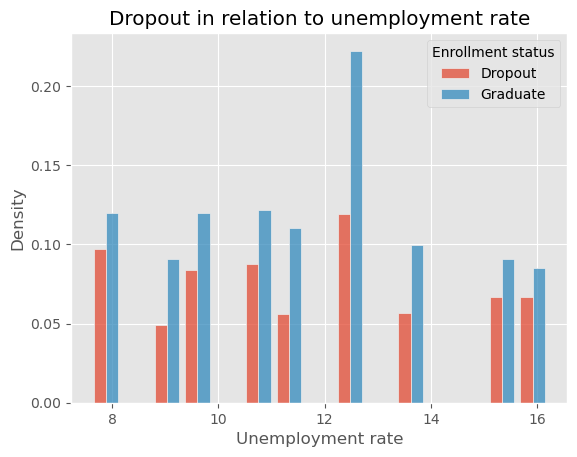

In [250]:
fig,ax = plt.subplots()
sns.histplot(x="Unemployment rate",data=df, hue=  "Enrollment status",multiple="dodge",discrete=False,shrink=.8,legend=True,stat="density")

ax.set_title("Dropout in relation to unemployment rate")
save_fig(fig, "dropout_unemployment_rate.svg")

To find proxies for enrollment status, we plot the correlation of all features in relation to eachother. We use dython's associaltions to ensure correct correlation metric, meaning we use Cramer's V for nominal-nominal, Pearson's R for numerical-numerical, and correlation ratio nominal-numerical

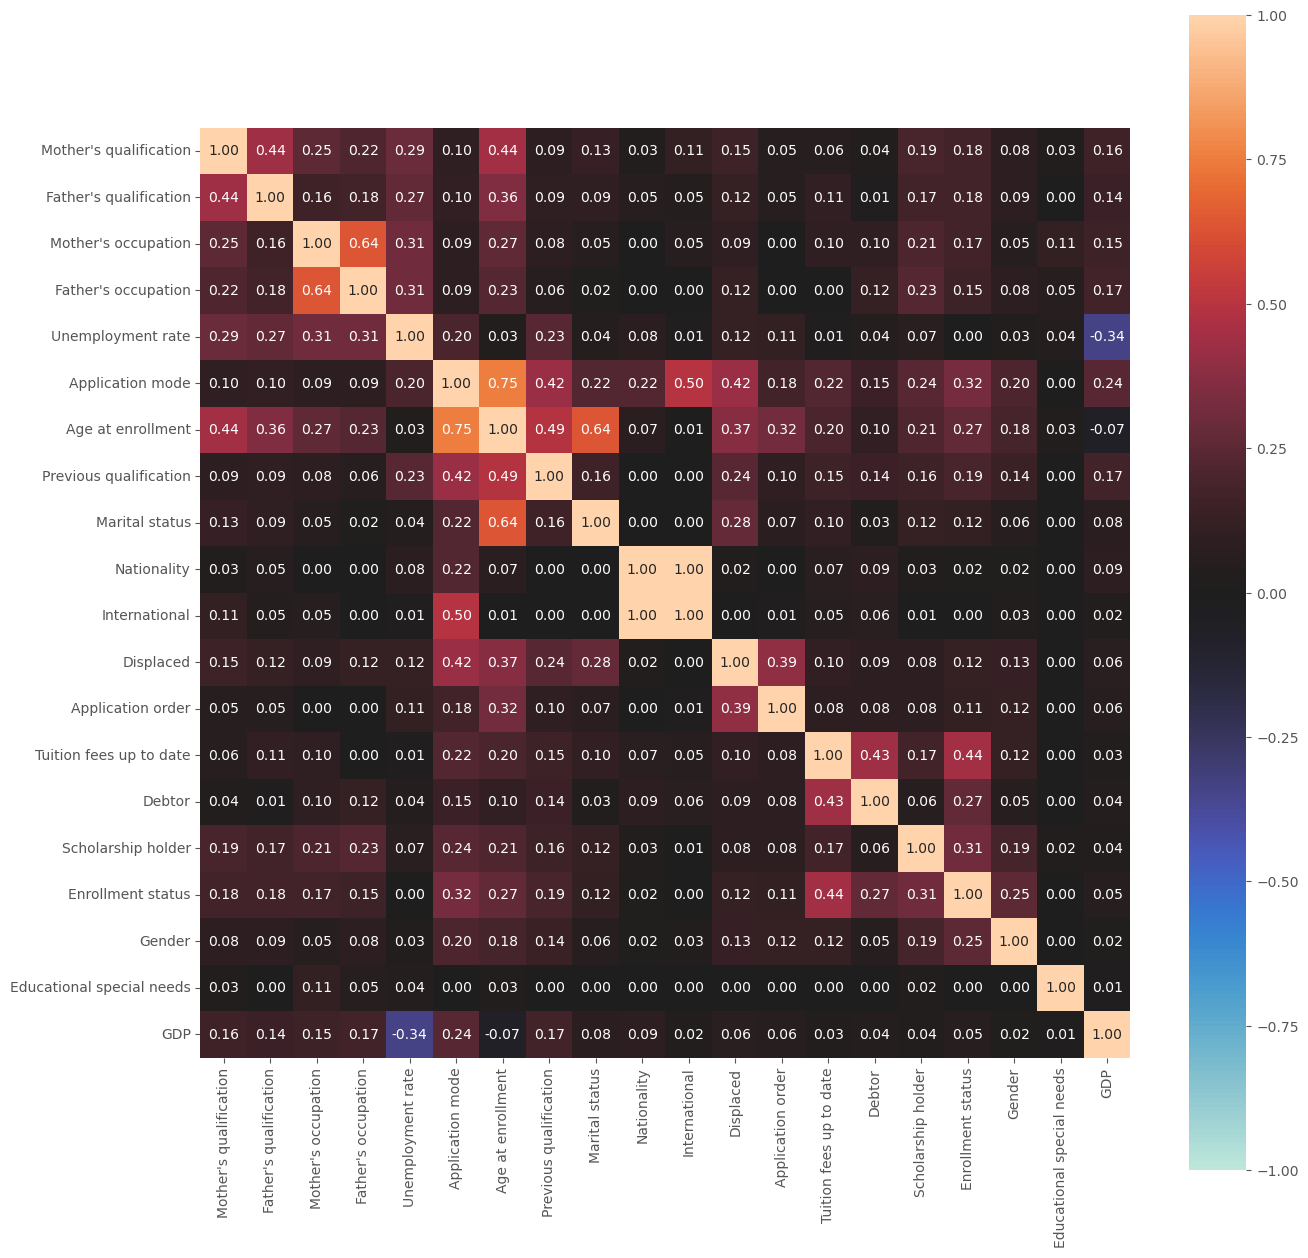

In [251]:
fig,ax = plt.subplots(figsize=(15,15))

nom_cols = ["Marital status","Application mode","Application order","Previous qualification",
            "Nationality","Mother's qualification","Father's qualification","Mother's occupation",
            "Father's occupation","Displaced","Educational special needs","Debtor","Tuition fees up to date",
            "Gender","Scholarship holder","International",  "Enrollment status"]
num_cols = ["Age at enrollment", "Unemployment rate","GDP"]
associations(df[nom_cols + num_cols], nominal_columns=nom_cols, numerical_columns=num_cols, ax=ax,clustering=True,annot=True)

ax.set_title("Correlations in dropout dataset")
save_fig(fig, "dropout_correlations_annotated.svg")


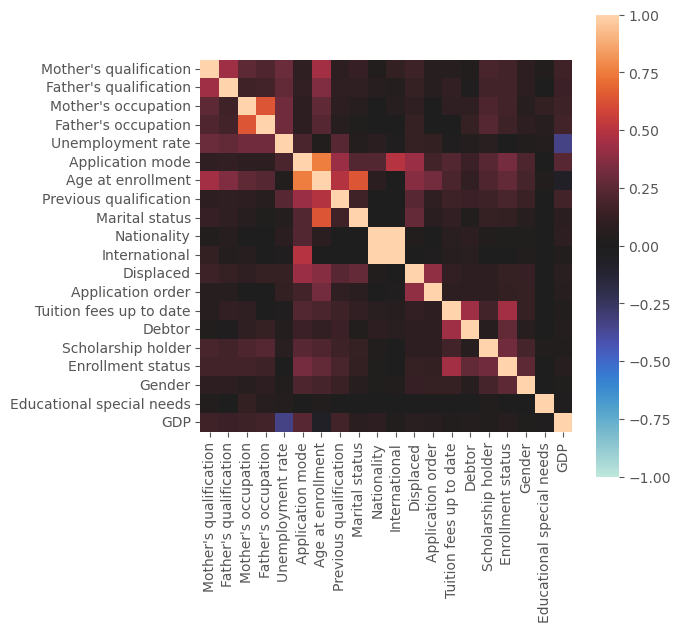

In [252]:
fig,ax = plt.subplots(figsize=(6,6))

nom_cols = ["Marital status","Application mode","Application order","Previous qualification",
            "Nationality","Mother's qualification","Father's qualification","Mother's occupation",
            "Father's occupation","Displaced","Educational special needs","Debtor","Tuition fees up to date",
            "Gender","Scholarship holder","International",  "Enrollment status"]
num_cols = ["Age at enrollment", "Unemployment rate","GDP"]
associations(df[nom_cols + num_cols], nominal_columns=nom_cols, numerical_columns=num_cols, ax=ax,clustering=True,annot=False)

ax.set_title("Correlations in dropout dataset")
save_fig(fig, "dropout_correlations.svg")


In [253]:
df.shape

(3630, 35)